# 1 Scipy

The scipy package contains various toolboxes dedicated to common issues in scientific computing. Its different submodules correspond to different applications, such as interpolation, integration, optimization, image processing, statistics, special functions, etc. `scipy` is the core package for scientific routines in Python; it is meant to operate efficiently on numpy arrays, so that numpy and scipy work hand in hand.

Here are some of the sub-packages contained in Scipy:

* File input/output: scipy.io
* Special functions: scipy.special
* Linear algebra operations: scipy.linalg
* Fast Fourier transforms: scipy.fftpack
* Optimization and fit: scipy.optimize
* Statistics and random numbers: scipy.stats
* Interpolation: scipy.interpolate
* Numerical integration: scipy.integrate
* Signal processing: scipy.signal
* Image processing: scipy.ndimage

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# 2 The Statistics sub-package

The `scipy.stats` sub-package contains a large number of probability distributions as well as a growing library of statistical functions. This is a great tool to have for any Data Analyst/Scientist using Python because Statistics is at the core of Data Science. 

In this section we learn how to perform common statistical computations with Python and use them to make sense of a dataset that contains information about alcohol consumption of teenagers.

# 3 Project: Alcohol consumption of students

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import sqrt, arange
from scipy import stats
%matplotlib inline

In [6]:
import warnings
warnings.filterwarnings('ignore')

In this project we use a dataset containing information about Portuguese students from two public schools. This is a real world dataset that was collected in order to study alcohol consumption in young people and its effects on students' academic performance. The dataset was built from two sources: school reports and questionnaires.

**Attributes:**

* 1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
* 2 sex - student's sex (binary: 'F' - female or 'M' - male) 
* 3 age - student's age (numeric: from 15 to 22) 
- 4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 
- 5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
- 6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
- 7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 -secondary education or 4 - higher education) 
- 8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 -secondary education or 4 - higher education) 
- 9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
- 10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
- 11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
- 12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
- 13 traveltime - home to school travel time (numeric: 1 <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
- 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
- 15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
- 16 schoolsup - extra educational support (binary: yes or no) 
- 17 famsup - family educational support (binary: yes or no) 
- 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
- 19 activities - extra-curricular activities (binary: yes or no) 
- 20 nursery - attended nursery school (binary: yes or no) 
- 21 higher - wants to take higher education (binary: yes or no) 
- 22 internet - Internet access at home (binary: yes or no) 
- 23 romantic - with a romantic relationship (binary: yes or no) 
- 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
- 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
- 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
- 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
- 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
- 29 health - current health status (numeric: from 1 - very bad to 5 - very good) 
- 30 absences - number of school absences (numeric: from 0 to 93) 

**these grades are related with the course subject:**

- 31 G1 - first period grade (numeric: from 0 to 20) 
- 31 G2 - second period grade (numeric: from 0 to 20) 
- 32 G3 - final grade (numeric: from 0 to 20, output target) 

In [9]:
student = pd.read_csv("~/Classes/Packt_Data_Analysis/data/data/student/student.csv", sep=";")

In [10]:
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In this demonstration we are interested in 3 variables: 

1. Alcohol consumption level (we will create it and call it acl)
2. Final grade for the course subject (G3)
3. Gender of the Student

In [16]:
student.rename(columns={'sex':'gender'}, inplace=True)
student['alcohol_index'] = (5 * student['Dalc'] + 2 * student['Walc'])/7

# Alcohol consumption level
student['acl'] = student['alcohol_index'] <= 2
student['acl'] = student['acl'].map({True: 'Low', False: 'High'})

## Confidence Intervals

### Confidence interval for the mean of the final grade

we can calculate confidence intervals for the means and for proportions.

In [17]:
sample_size = student.shape[0]
print(sample_size)

649


Because we have a sample size that is much greater than 30, we can use the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) to calculate confidence intervals. According to this theorem we can calculate a confidence interval for the mean using the normal distribution.

To get the confidence interval for the mean we need three numbers:

1. Sample mean
2. Standard error
3. Confidence level

Formula for the standar error:


$$ SE = \frac{s}{\sqrt n} $$

In [20]:
sample_mean_grade = student['G3'].mean()
sample_mean_grade

11.906009244992296

In [22]:
std_error_grades = student['G3'].std()/sqrt(sample_size)

In [23]:
stats.norm.interval(0.95, loc = sample_mean_grade, scale = std_error_grades )

(11.65745768566587, 12.154560804318722)

Now let's calculate a confidence interval for the proportion of students with High Alcohol Consumption Level. Again we need 3 numbers:

1. Sample proportion
2. Standard error
3. Confidence level

For proportions the standars error is given by:

$$ SE = \sqrt \frac{\hat p (1 - \hat p)}{n} $$

In [25]:
student['acl'].value_counts(normalize=True)

Low     0.744222
High    0.255778
Name: acl, dtype: float64

In [26]:
high_prop = student['acl'].value_counts(normalize=True)['High']
std_error_prop = sqrt(high_prop * (1 - high_prop)/sample_size)

In [27]:
stats.norm.interval(0.98, loc = high_prop, scale = std_error_prop)

(0.21593666225148048, 0.2956195781183193)

0.25 (or 25.0%) seems like a good guess for the proportion of students with High Alcohol Consumption Levels in the population.

## Probability Calculations

There are dozens of probability distributions available in the stats package for doing simulations of random variables or probability calculations. You can take a look at the reference [here](https://docs.scipy.org/doc/scipy/reference/stats.html)

**Assumming the P(High ALC) = 0.25. In a class of 10, What is the probability of finding 5 students with High ACL?**

In [28]:
stats.binom.pmf(k=5, n=10, p=0.25)

0.058399200439453194

In [29]:
def plot_probs_n(n):
    fig, ax = plt.subplots(1,2, figsize = (14,4))
    ax[0].bar(left=arange(n+1), height=stats.binom.pmf(k=arange(n+1), n=n, p=0.25))
    ax[0].set_xticks(arange(n+1))
    ax[0].set_title('Probability mass function')
    ax[1].plot(stats.binom.cdf(k=range(n+1), n=n, p=0.25))
    ax[1].set_xticks(arange(n+1))
    ax[1].set_title('Cumulative distribution function')

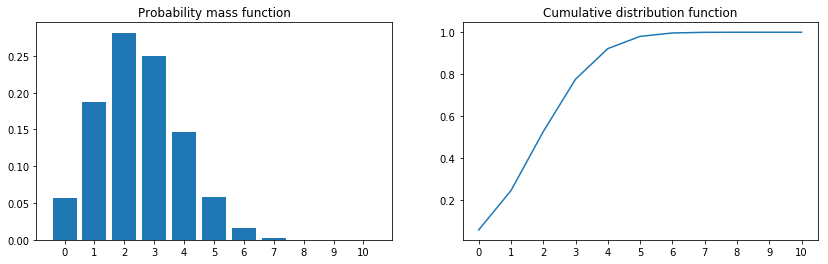

In [30]:
plot_probs_n(10)